# Today's Menu

1. Overview of the Generalized Linear Model (GLM)
    - Types of Variables
    - Scale Types
    - Linear Combination of Predictors
        - Linear Combination of Metric Predictors
        - Linear combination of Nominal Predictors
    - Linking from combined Predictors to Noisy Data
<br><br><br>
2. Metric Predicted Variable on One or Two Groups
    - Normal Distribution as a Likelihood Function
    - Solution by Mathematical Analysis
    - Approximation via MCMC — Effectiveness of a Smart Drug on IQ
    - Outliers and Robustness Estimation: The $t$ Distribution
    - Using the $t$ Distribution — MCMC vs HMC
    - Two Groups

--------------------------------------

# Overview of the Generalized Linear Model (GLM)

* The goal of this chapter is to provide an overview of the chapters to come.
  * In other words, it can be considered a table of content that put
    everything in context and points to the right chapter given a
    dataset you would like to analyze.
 

## Types of Variables

In the context of GLM we differentiate between:

* **Predicted variables**
  
  * Predicted variables correspond to the type of data we are
    interested in predicting.
  
* **Predictor variables**

  * Predictor variables correspond to the variables our predictions
    depend on.

* Sometimes predicted variables are referred to as _dependent_
  variables and predictors as _independent_ variables.

### Examples

* Predicting weight based on height.
  * Weight is the predicted variable.
  * Height is the predictor variable.
  
* Predicting IQ of people taking a Smart Drug or a placebo.
  * IQ is the predicted variable.
  * Placebo/Smart Drug is the predictor.


## Scale Types

* The variables above can be measure in different _scales_. Each of
  the scales will result in slight variations of the GLM.
  * For instance, the participants of a race can be measure by speed,
    distance, final position, team, etc.

* We consider the following scales

* **Metric scale** corresponds to a scale with a natural zero
    point. The zero point represents absence of what is being
    measured. Also, there is an order and distance between elements in
    the scale, .e.g, from $4$ to $5$ there is distance 1, and from
    $24$ to $100$ there is distance $76$.
  * Examples:
    * Temperature
    * Speed
    * Duration
  
* **Count data** is a special case of metric scale where we are
  interested in measuring _frequency_ of something happening.
  * Examples:
    * Attendants to a party
    * Beers in a party night
    * Cars passing by an intersection
  
* **Ordinal scale** is a scale where there exist order by no distance
  between elements.
  * Examples:
    * Positions in a race
    * Poll answers (disagree, neutral, agree)
  * **[QUESTION: What is the difference between the metric and ordinal scales?]**

* **Nominal scale** compare categorical elements, there is neither
  order nor distance between the elements in the scale.
  * Examples:
    * Political Party
    * Text Editor
    * Programming Language


## Linear Combination of Predictors
* The core of GLM is to express the combined influence of predictors as
  their weighted sum.
  
* In what follows we show describe different scenario of modeling a
  metric predicted variable from a combination of metric and nominal
  predictors, respectively.
  

### Linear Combination of Metric Predictors
* Here we look at the case of having one metric predicted variable
  that depends on a linear combination predictor variables.

#### Linear combination of a single metric predictor

* One simple case is finding a linear relation between the linear
  predicted variable $y$ and one predictor $x$.
  
* For instance, predicting weight based on height.

$$
y = \beta_0 + \beta_1x
$$

* The figure below shows an example

<br><br>
<figure>
  <img src="figures/metric-predicted-one-metric-predictor.jpg" alt="Figure 15.1" width="400px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figure 15.1. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

#### Additive combination of metric predictors

* Additive predictors are predictors that have the same increase on
  the predicted variable.
  * Note that this is a design decision that may not hold.

$$
y = \beta_0 + \beta_1 x_1 + \ldots + \beta_k x_k
$$

* The figure below shows examples of additive combinations of metric
  predictors.

<br><br>
<figure>
  <img src="figures/metric-predicted-two-additive-metric-predictor.jpg" alt="Figure 15.2" width="400px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figure 15.2. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

#### Non-additive relation of metric predictors

* On the contrary, if predictors influence each other we need to
  include a new term to model this influence.

* For instance, predicting weight based on height and fat index.

* The formula below corresponds to a _multiplicative_ relation between
  predictors.

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{1\times 2} x_1 x_2
$$

* The figure below shows the shape of different instances of the
  formula.

<br><br>
<figure>
  <img src="figures/metric-predicted-two-nonadditive-metric-predictor.jpg" alt="Figure 15.3" width="400px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figure 15.13. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

### Linear combination of nominal predictors

#### Linear model for a single nominal predictor

* Notation
  * We use a vector, $\vec{x} \triangleq \langle x_{[1]}, x_{[2]},
    \ldots, x_{[J]} \rangle$ where $x_{[i]} \in \{0,1\}$, to represent
    different nominal values—concretely, $J$ nominal values. A value
    $1$ in the position $x_{[i]}$ and $0$ in the rest represents
    nominal value $i$.
  * For instance, if we use $x_{[0]}$ for male and $x_{[1]}$ for
    female, then we would have that $\mathit{male} \colon \langle 1,0
    \rangle$ and $\mathit{female}\colon \langle 0,1 \rangle$.
    * In this example, $\vec{x}$ is a nominal predictor variable
      representing the genders male and female.

* Formally,

    \begin{align}
    y =&\; \beta_0 + \beta_{[1]} x_{[1]} + \ldots + \beta_{[J]} x_{[J]} \\
    =&\; \beta_0 + \vec{\beta} \cdot \vec{x}
    \end{align}

    where each $x_{[i]}$ for $i \in J$ represent each nominal
    predictor variable and $\beta_0$ is the baseline.

    The equation must satisfy the following constraint

    $$
    \sum^{J}_{j=1} \beta_{[j]} = 0
    $$

* **[QUESTION: Why is this constraint necessary?]**


* The example below shows an analysis of height data, $y$, using the
  nominal predictor variable above for the genders male and
  female. The baseline, $\beta_0$ is defined as $1.69cm$.
  * **[QUESTION: Can we choose another baseline? What would happen then?]**
  
<br><br>
<figure>
  <img src="figures/nominal-predictor-example.jpg" alt="Figure 15.4" width="400px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figure 15.4. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

#### Additive combination of nominal predictors

* In this case, the combination of nominal predictors is:

    \begin{align}
    y &= \; \beta_0 + \vec{\beta_1} \cdot \vec{x_1} + \vec{\beta_2} \cdot \vec{x_2} \\
    &= \; \beta_0 + \sum_j \beta_{1[j]} x_{1[j]} + \sum_k \beta_{2[k]} x_{2[k]}
    \end{align}

    as before with constraints

    $$
    \sum_{j} \beta_{1[j]} = 0 ~~~~~~~ \text{ and } ~~~~~~~ \sum_{k} \beta_{2[k]} = 0
    $$

#### Non-additive combination of nominal predictors

* Finally, in this case, the nominal predictors are combined as follows:

    \begin{align}
    y &= \; \beta_0 + \vec{\beta_1} \cdot \vec{x_1} + \vec{\beta_2} \cdot \vec{x_2} + \vec{\beta_{1\times 2}} \cdot \vec{x_{1\times 2}} \\
    &= \; \beta_0 + \sum_j \beta_{1[j]} x_{1[j]} + \sum_k \beta_{2[k]} x_{2[k]} \sum_{j,k} \beta_{1\times 2[j,k]} x_{1\times 2[j,k]}
    \end{align}

    we require that the summation of the coefficients $\beta_i$ for
    each predictors equals $0$.

    \begin{align}
    \sum_{j} \beta_{1[j]} = 0 \; & \text{ and } \; \sum_{k} \beta_{2[k]} = 0 \\
    \sum_{j} \beta_{1\times 2[j,k]} = 0 \; \text{ for all } k \; & \text{ and } \; \sum_{k} \beta_{1\times 2[j,k]} = 0 \text{ for all } j
    \end{align}

<br><br>
<figure>
  <img src="figures/nominal-predictors-add+nonadd-example.jpg" alt="Figure 15.5" width="700px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figure 15.5. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

### Summary — Predicted variable in Combination with Metric and Nominal Predictors
<br><br>
<figure>
  <img src="figures/table15.1.jpg" alt="Table 15.1" width="700px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Table  15.1. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>



## Linking From combined Predictors To Noisy Data

### From Predictors to Predicted central tendency

* The _link function_ $f(\cdot)$ (precisely, the "inverse" link
  function) is a function mapping the linear combination of predictors
  ($\mbox{lin}(x)$) to the predicted value ($y$). Formally,

$$
y = f(\mbox{lin}(x))
$$


* The previous examples use the identity function, _i.e._,
  $f(\mbox{lin}(x))=\mbox{lin}(x)$.
  
* Sometimes the identity function may not be suitable as a link
  function. For instance, when $\mbox{lin}(x)$ has negative slope.

  * Consider these data

| Participant ID | Caffeine consumption ($cc$) | Response Time ($rt$) |
|----------------|-----------------------------|----------------------|
| 1              | 1                           | 4                    |
| 2              | 2                           | 3                    |
| 3              | 3                           | 2                    |
| 4              | 4                           | 1                    |

  * The following function perfectly fits the data.

$$
rt = 5 + (-1)cc 
$$

* **[QUESTION: What happens to values equal or greater than $5$]**

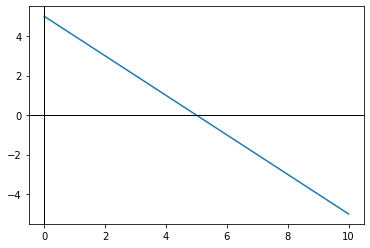

In [2]:
from matplotlib import pyplot as plt
import numpy as np

x=np.linspace(0,10,100)

lin = lambda cc: 5 + (-1)*cc  # Linear combination of predictors
f   = lambda  x: x            # Link function as identity function 

plt.plot(x,f(lin(x)))
plt.axhline(lw=1,color='black')
plt.axvline(lw=1,color='black')
plt.show()

#### The logistic function

* A common link function is the _logistic function_

$$
\mathit{logistic}(x) = \frac{1}{1+\exp(-x)}
$$

* This function goes from Reals to the interval $(0,1)$, formally,
  $\mathit{logistic}\colon \mathbb{R} \rightarrow (0,1)$. As the
  parameter of the function goes decreases the function gets close to
  $0$. Conversely, as the input parameter increases the function goes
  to $1$.
  
* The logistic function is often expressed in terms of its _gain_
  $\gamma$ and _threshold_ $\theta$.

    $$
    \mathit{logistic}(x) = \frac{1}{1+\exp(-\gamma(x-\theta))}
    $$

  * The threshold is the point in the x-axis for which $y=0.5$.

  * The gain is how steeply the function raises through that point.
  
* The program below rewrites the plot above using a logistic function
  as a link function.


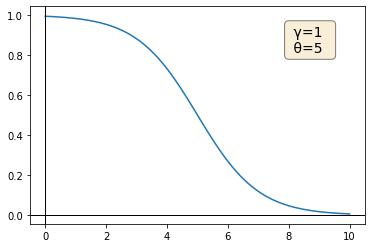

In [3]:
f = lambda  x: 1/(1+np.exp(-x))  # Link function as logistic function
plt.plot(x,f(lin(x)))
plt.axhline(lw=1,color='black')
plt.axvline(lw=1,color='black')

textstr = ' γ=1  \n θ=5  '
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(8, 0.95, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.show()

* The inverse of the logistic function is denoted as $\mathit{logit}$
  function. So the link function may be expressed in these two forms:
  
\begin{align}
y &= \mathit{logistic}(\mbox{lin}(x))\\
\mathit{logit}(y) &= \mbox{lin}(x) 
\end{align}


#### The cumulative normal function

* The cumulative normal function, denoted $\Phi(x; \mu,\sigma)$
  expresses the amount of probability density of a normal distribution
  $\mathcal{N}(\mu,\sigma)$ up to point $x$.


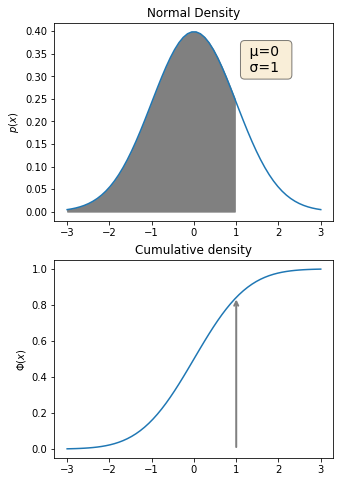

In [4]:
from scipy.stats import norm
x = np.linspace(-3,3,num=60)
pdf = lambda x: norm.pdf(x,loc=0,scale=1)
cdf = lambda x: norm.cdf(x,loc=0,scale=1)
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(5,8))
ax1.plot(x,pdf(x))
ax1.fill_between(x[:40], 0, pdf(x)[:40], color='grey')
ax1.set_ylabel('$p(x)$')
ax1.set_title('Normal Density')
ax2.plot(x,cdf(x))
ax2.set_ylabel('$\Phi(x)$')
ax2.set_title('Cumulative density')
ax2.annotate("", xy=(1, cdf(1)), xytext=(1, 0), arrowprops=dict(arrowstyle="->",color='grey',lw=2))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr=' μ=0  \n σ=1  '
ax1.text(1.2, 0.37, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.show()

* Note that logistic and cumulative normal look similar. Analysts will
  use either of them depending on the mathematical convenience of
  interpretation.
  
* In $\Phi$ the parameter $\mu$ corresponds to the point at which
  $\Phi(x)=0.5$ (as $\theta$ for the logistic function). The parameter
  $\sigma$, on the other hand, represents its steepness. Small values
  of $\sigma$ correspond to steeper functions.
* The inverse of the cumulative normal function is denoted as
  $\mathit{probit}$ function. So the link function may be expressed in
  these two forms:
  
\begin{align}
y &= \Phi(\mbox{lin}(x))\\
\mathit{probit}(y) &= \mbox{lin}(x) 
\end{align}

## From Predicted Central Tendency to Noisy Data
* There will always exist noise in the data $y$ we obtained from the
  real world.
  * The noisy can be caused by, _e.g._, precision of the measurement
    devices we utilize; or the inherent to the process we are
    measuring, _e.g._, votes of individuals to a political party; or
    both such as measuring the temperature in some part of a country.

* Consequently, the best we can do is to estimate the most likely
  value of $y$. That is, we should use a probability distribution that
  captures the tendency of the data (the most likely value) plus its
  variance (the inherent noise).

* Formally, we go from the tendency of the data ($f(\mbox{lin}(x))$)
  to a probability distribution centered at the tendency of the
  data. Let, for convenience, $\mu=f(\mbox{lin}(x))$:
  
  $$
  y \sim \mbox{pdf}(\mu, [\mbox{scale},\mbox{shape},\ldots])
  $$
  
* The form of $\mbox{pdf}(\cdot)$ depends on the [measurement scale of
  the data](#Scale-Types).
  * For instance, if the metric predicted variable is a real value
    from minus to plus infinity, then we common distribution to use is
    the normal distribution $y \sim \mathcal{N}(\mu,\sigma)$ with
    $\mu=f(\mbox{lin}(x))$. If, additionally, the the link function is
    the identity function, then we are in the case of _linear
    regression_. On the other hand, if we pick a logistic link
    function, we have _logistic regression_.
  
<br><br>
<figure>
  <img src="figures/regression-examples.jpg" alt="Figures 15.(9,10)" width="1000px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figures 15.(9,10). John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

### Examples of Typical Noise Distributions and Inverse Link Functions

<br><br>
<figure>
  <img src="figures/table15.2.jpg" alt="Table 15.2" width="600px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Table 15.2. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

## Formal Expression of the Generalized Linear Model

The general formal expression of the GLM is:

<br><br>
<font size='3'>
\begin{align}
\mu &= f(\mbox{lin}(x),[\mbox{parameters}]) \\
  y &\sim \mbox{pdf}(\mu, [\mbox{parameters}])
\end{align}
</font>

where $\mbox{lin}(x)$ is a linear function over the predictors $x$,
$f(\cdot)$ is the inverse link function, $y$ is the data which is
distributed over the central tendency $\mu$ according to a probability
distribution $\mbox{pdf}$.



## Summary of Chapters in the Book
<br><br>
<figure>
  <img src="figures/summary-chapters.jpg" alt="Table 15.3" width="650px"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Table 15.3. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>


-----------------------------------

# Metric Predicted Variable on One or Two Groups

* Here we consider the most trivial case of Generalized Linear Model (GLM):
  * The link function is the identity function ($f(x) = x$).
  * _Normal distribution_ to model the noise in the data.
  
* We explore different parameters for the prior of the normal
  distribution.

* We also discuss different distributions to model the data.


## Normal distribution as a likelihood function
* So far we have only seen _Bernoulli_ and _Binomial_ distribution as
  likelihood functions.
  
* Here we explain the intuition behind using a normal distribution as
  a likelihood function.

* The probability density of a datum $y$ given a normal distribution
  with parameters $\mu$ and $\sigma$ is:

$$
p(y \mid \mu, \sigma) = \frac{1}{Z} \, \exp\left(-\frac{1}{2}\frac{(y-\mu)^2}{\sigma^2}\right)
$$

where $Z = \sigma \sqrt{2\pi}$ is the normalizing factor (which we do
not use in the derivations below).

Given the values $y_1=85$, $y_2=100$, $y_3=115$ and the set $D =
\{y_1,y_2,y_3\}$. The probability of $p(D\mid\mu,\sigma)$ is the
multiplicative product $\prod_{y\in D} p(y\mid \mu,\sigma)$.

The figure below shows $p(D\mid \mu,\sigma)$ of each datum for
different values of $\mu$ and $\sigma$.
<br><br>
<figure>
  <img src="figures/likelihood-data-points.png" alt="Figure 16.1" width="700"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figure 16.1. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

### How can we find the values for $\mu$ and $\sigma$ that better fit the data?

* The answer lies in Bayes' theorem:

$$
p(\mu,\sigma \mid D) = \frac{p(D\mid\mu,\sigma)\,p(\mu,\sigma)}{\int \int d\mu \, d\sigma \; p(D\mid \mu,\sigma)\,p(\mu,\sigma)}
$$

## Solution by Mathematical Analysis

* For simplicity, let us assume that the standard deviation is fixed
  to some constant value $\sigma = S_y$.

* Also, we set a prior distribution with mean $M_\mu$ and standard
  deviation $S_\mu$.
  
* It turns out that the product of normal distributions results in a
  normal distribution.
  
* Therefore, we pick a normal distribution for the prior of $\mu$, as
  it is a _conjugate prior_. **[QUESTION: What is a conjugate prior?]**


\begin{align}
p ( y \mid \mu,\sigma) = \; & p(y\mid\mu,S_y)p(\mu)\\
\propto \; & \exp \left( -\frac{1}{2} \, \frac{(y - \mu)^2}{S^2_y} \right) \, 
             \exp \left( -\frac{1}{2} \, \frac{(\mu - M_\mu)^2}{S^2_\mu} \right) \\
= \; & \exp \left( -\frac{1}{2} \, \left[ \frac{(y - \mu)^2}{S^2_y}  + \frac{(\mu - M_\mu)^2}{S^2_\mu} \right] \right) \\
= \; & \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_\mu (y - \mu)^2  + S^2_y (\mu - M_\mu)^2}{S^2_y S^2_\mu} \right] \right) \\
= \; & \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_\mu (y^2 +\mu^2 - 2y\mu)  + S^2_y (\mu^2 + M^2_\mu - 2 \mu M_\mu)}{S^2_y S^2_\mu} \right] \right) \\
= \; & \exp \left( -\frac{1}{2} \, \left[ \frac{\mu^2(S^2_\mu + S^2_y) - 2 \mu(S^2_\mu y + S^2_y M_\mu) + S^2_\mu y^2 + S^2_y M^2_\mu}{S^2_y S^2_\mu} \right] \right) \\
= \; & \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_y + S^2_\mu}{S^2_y S^2_\mu} \left( \mu^2 - 2 \mu \frac{S^2_y M_\mu + S^2_\mu y}{S^2_y + S^2_\mu} + \frac{S^2_y M^2_\mu + S^2_\mu y^2}{S^2_y + S^2_\mu} \right) \right] \right) \\
= \; & \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_y + S^2_\mu}{S^2_y S^2_\mu} \left( \mu^2 - 2 \mu \frac{S^2_y M_\mu + S^2_\mu y}{S^2_y + S^2_\mu} \right) \right] \right) \times \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_y + S^2_\mu}{S^2_y S^2_\mu} \left( \frac{S^2_y M^2_\mu + S^2_\mu y^2}{S^2_y + S^2_\mu} \right) \right] \right) \\
\propto \; & \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_y + S^2_\mu}{S^2_y S^2_\mu} \left( \mu^2 - 2 \mu \frac{S^2_y M_\mu + S^2_\mu y}{S^2_y + S^2_\mu} \right) \right] \right) 
\end{align}

* The last step was valid because the term we dropped is a constant.

* Now we can "complete the square in $\mu$" to end up with an equation
  that looks like the density function for normal distributions.
  
$$
\begin{align}
p(y\mid\mu,S_y)p(\mu) \propto \; & \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_y + S^2_\mu}{S^2_y S^2_\mu} \left( \mu^2 - 2 \mu \frac{S^2_y M_\mu + S^2_\mu y}{S^2_y + S^2_\mu} + \left( \frac{S^2_y M_\mu + S^2_\mu y}{S^2_y + S^2_\mu} \right)^2 \right) \right] \right) \\
= \; & \exp \left( -\frac{1}{2} \, \left[ \frac{S^2_y + S^2_\mu}{S^2_y S^2_\mu} \left(\mu - \frac{S^2_y M_\mu + S^2_\mu y}{S^2_y + S^2_\mu} \right)^2 \right] \right) ~~ (16.4)\\
\end{align}
$$

* For presentation purposes I copy here again the density function of
  a normal distribution.
  
$$
p(y \mid \mu, \sigma) = \frac{1}{Z} \, \exp\left(-\frac{1}{2}\frac{(y-\mu)^2}{\sigma^2}\right)
$$

* Note that Equation 16.4 (for the posterior distribution) shows that
  the mean and standard deviation are:

$$
\frac{S^2_y M_\mu + S^2_\mu y}{S^2_y + S^2_\mu} ~~ \text{ and } ~~ \sqrt{\frac{S^2_y S^2_\mu}{S^2_y + S^2_\mu}} \text{, respectively.}
$$

* Technically, the equations for mean and standard deviation give us
  the answer we were looking for.

* However, expressing them in terms of <em>precision</em>, gives
  further insights.
  * Precision is defined as the inverse square of the standard
    deviation $\frac{1}{\sigma^2}$.

* The precision of the posterior is:

$$
\frac{S^2_y + S^2_\mu}{S^2_y S^2_\mu} = \frac{1}{S^2_\mu} + \frac{1}{S^2_y}
$$

* This results is easier to interpret; the posterior precision is the
  sum of the prior and likelihood precisions.
  
* The posterior mean can also be expressed in terms of precisions:

$$
\frac{1/S^2_\mu}{1/S^2_y + 1/S^2_\mu}M_\mu + \frac{1/S^2_y}{1/S^2_y + 1/S^2_\mu}y
$$

* That is, a weighted sum of the prior mean and the datum with their
  respective precisions.

* Therefore, when the prior is highly precise compared to the
  likelihood then the posterior mean is near the prior's mean and
  _vice versa_.

* The formulas for mean and precision can be naturally extended to $N$
  values.
  
* Here we use an observation from mathematical statistics that when a
  set of values $y_i$ are generated from a normal likelihood function,
  the mean of those values is $\bar{y}$ is also normally distributed
  with the same mean, and standard deviation $\sigma/\sqrt{N}$.

* Thus we can simply apply the formulas for mean and precision derived
  above to the distribution
  $\text{normal}(\bar{y}\mid\mu,\sigma/\sqrt(N))$, i.e., 
  
$$
\text{Mean:}~~\frac{1/S^2_\mu}{1/S^2_\bar{y} + 1/S^2_\mu}M_\mu + \frac{1/S^2_\bar{y}}{1/S^2_\bar{y} + 1/S^2_\mu}\bar{y}
~~~~~~~~~
\text{Precision:}~~\frac{1}{S^2_\mu} + \frac{N}{S^2_\bar{y}}
$$

* When fixing $\mu$ and computing the posterior using precision
  instead of standard deviation, the Gamma distribution is a
  conjunctive prior.

## Approximation via MCMC — Effectiveness of a Smart Drug on IQ

* Here we use Metropolis to estimate mean and standard deviation from
  a set of data that related to the effect of a smart drug to IQ.
  
* The data is drawn from a normal likelihood function with $\mu=100$
  and $\sigma=15$. Several studies have confirm that IQ distributes
  across the population according to this normal distribution.


<figure>
    <img src="figures/iq.jpg" width=700 height=860>
    <figcaption>
            <p style="font-size: xx-small; text-align: center">            
                    <i>Source: <a href="https://scholar.flatworldknowledge.com/books/127/stangor-ch01">Charles Stangor. “Introduction to Psychology”. FlatWorld. 2010</a></i>
            <p>
    </figcaption>
</figure>



<!-- <p float="left"> -->
<!--     <img src="figures/homer-iq.jpg" width="200px"> -->
<!--     <img src="figures/iq.png" width="400px"> -->
<!-- </p> -->
  
* We set priors for the mean and standard deviation that are broad and
  have minimal influence in the posterior:
  * _Mean_: We use a normal distribution with mean the real mean of
    the data, and standard deviation $100$ times larger than the
    standard deviation of the data.
  * _Standard deviation_: We use a very large uniform prior from
    $\frac{1}{1000}$ to $1000$ times the standard deviation of the
    data.

* **[QUESTION: If we can compute the standard deviation and mean from
  the data, why do we do approximate the posterior at all?]**

* Alternatively, one should ask experts in the domain to set the
  values of the priors.


In [5]:
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt

df = pd.read_csv('data/TwoGroupIQ.csv')
y = df[df.Group=='Smart Drug'].Score.to_numpy()

Ntotal  = len(y)
μy      = np.mean(y)
σy      = np.std(y)

with pm.Model() as normal_standard:
    σ = pm.Uniform('σ', lower=1/1000, upper=σy*1000)
    μ = pm.Normal('μ', mu=μy, sigma=100*σy)
    
    obs = pm.Normal('obs', mu=μ, sigma=σ, observed=y)

    eff_size = pm.Deterministic('eff_size',(μ-100)/σ)

    trace = pm.sample(20000, chains=2, tune=1000, step=pm.Metropolis())

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [μ]
>Metropolis: [σ]
Sampling 2 chains, 0 divergences: 100%|██████████| 42000/42000 [00:21<00:00, 1941.57draws/s]
The number of effective samples is smaller than 25% for some parameters.


* Here we show the graphical representation of the model; obtained
  with `pm.model_to_graphviz(normal_standard)`.

<img src="figures/model.png" width=500px>

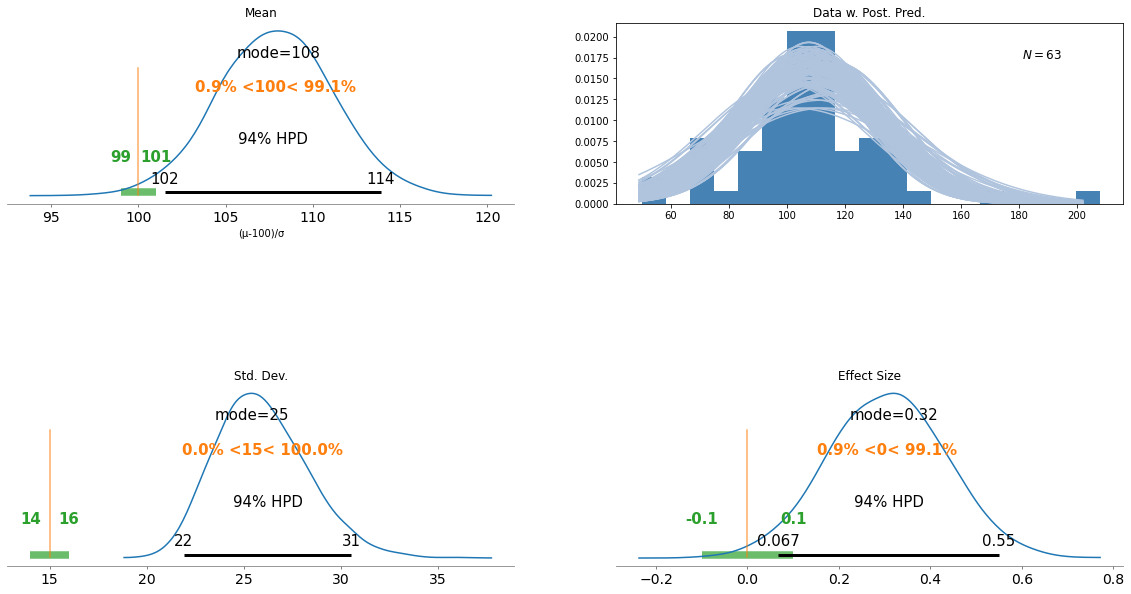

In [6]:
# Plotting Figure 16.3


def plot_hist_dens(init,end,y,trace,num_ppcs,ax):
    if num_ppcs > len(trace):
        print('num_ppcs is greater than the length of the trace. '+str(num_ppcs)+' > '+str(len(trace))+ '.')
        print('You must enter a number less or equal than the length of the trace.')
        return None
    X = np.linspace(init,end,(end-init)*10)  # Between any two points there are ten points (e.g., 0, 0.1, 0.2, ...)
    Y = lambda mu,sigma: [norm.pdf(x,loc=mu,scale=sigma) for x in X]
    [ax.plot(X,Y(s['μ'],s['σ']), color='lightsteelblue') for s in trace[len(trace)-num_ppcs:]]
    weights = np.ones_like(y)/(len(y)*10)  # Rescale the histogram to look like in the figure
    ax.hist(y, bins=19, weights=weights, color="steelblue")
    ax.text(0.8, 0.8, r'$N='+str(len(y))+'$', transform=ax.transAxes, fontsize=12)


fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
pm.plot_posterior(trace['μ'], point_estimate='mode', ref_val=100, rope=(99,101), ax=axs[0,0])
plot_hist_dens(49,202,y,trace,250,axs[0,1])
pm.plot_posterior(trace['σ'], point_estimate='mode', ref_val=15, rope=(14,16), ax=axs[1,0])
pm.plot_posterior(trace['eff_size'], point_estimate='mode', ref_val=0, rope=(-0.1,0.1), ax=axs[1,1])
axs[0,0].set_title('Mean')
axs[0,0].set_xlabel('μ')
axs[0,1].set_title('Data w. Post. Pred.')
axs[0,0].set_xlabel('y')
axs[1,0].set_title('Std. Dev.')
axs[0,0].set_xlabel('σ')
axs[1,1].set_title('Effect Size')
axs[0,0].set_xlabel('(μ-100)/σ')
fig.subplots_adjust(hspace=1)
plt.show()

### Interpretation of the graphs

* The mean seems to be different than that of the original
  distribution, _i.e._, $\mu=100$. The HDI excludes a _"generous"_
  ROPE from 99 to 101. However, the distance to the ROPE is not very
  large. Taking into account that one of MCMC methods is the accuracy
  in the limits of the HDI, we cannot make strong statements.
  
* To support the claim above we computed the _effect size_. The metric
  measures the standardized difference between means, formally,
  $\frac{\mu_1-\mu_2}{\sigma}$ where $\sigma$ is the standard
  deviation of either distribution (we chose the inferred standard
  deviation).
  * A bit more info in
    [Wikipedia](https://en.wikipedia.org/wiki/Effect_size#Difference_family:_Effect_sizes_based_on_differences_between_means).

* The posterior of the effect size barely excludes zero, and includes
  part of a ROPE $(-0.1,0.1)$. Thus, confirming our original claim
  stating that: even though there is evidence of a difference, it is
  not conclusive.
  
* The posterior standard deviation, however, greatly differs to that
  of the data, _i.e._, $\sigma=15$. The HDI goes from $21.6$ to
  $30.4$, far away from any reasonable ROPE (we show a ROPE
  $(14,16)$).
  
* The graph on the top right is a type of _posterior predictive
  check_. We pick credible values for $\mu$ and $\sigma$ from the set
  of samples, and plot them together with the data.
  
* The posterior predictive check shows that the our model captures the
  model relatively well. However, there are some _outliers_ in the
  tails of the distribution.
  * Outliers are values in the dataset that do not accommodate to the
    distribution (in this example a normal distribution).
  

### Some Diagnosis

In [ ]:
pm.summary(trace)

* The diagnosis show an surprisingly low number for the effective
  sample size (ESS), `n_eff`. **[QUESTION: What would be a good number
  of `n_eff`? What could we do to fix it?]**



In [ ]:
pm.traceplot(trace)
plt.show()

## Outliers and Robustness Estimation: The $t$ distribution

* When data does not seem to accommodate a normal distribution, it is
  common to use other distribution where we can adjust the "tails" of
  the normal distribution. For instance, by making them taller or
  flatter.
  
* There is a distribution known as _$t$ distribution_ or _Student $t$
  distribution_ (see book for the reason), which includes an extra
  parameter "scale" parameter adjust its tails.
  
* The parameter to control the tails in the $t$ distribution is called
  the "normality" parameter and it is denoted by the Greek letter
  $\nu$ (nu).
  * The normality parameter $\nu$ can range from $0$ to $\infty$.


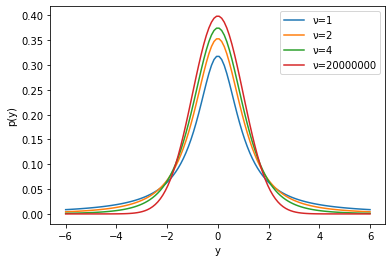

In [9]:
# Figure 16.4
from scipy.stats import t
import numpy as np
x=np.linspace(-6,6,12*10)
[plt.plot(x,t.pdf(x, df=ν, loc=0, scale=1),label='ν='+str(ν)) for ν in [1,2,4,20000000]]
plt.xlabel('y')
plt.ylabel('p(y)')
plt.legend(loc='best')
plt.show()

### Example on better fitting data with the $t$ distribution

* Below we show the _maximal likelihood estimates_ for 5 "toy" data
  points, _i.e._, the values for normal and $t$ distributions that
  better fit the data.
  * Formally speaking, given the dataset $D$, parameters were found
    that maximize likelihood functions $p(D\mid\mu,\sigma)$ and
    $p(D\mid\nu,\mu,\sigma)$.
  
* Observe that the $t$ distribution better describes the shape of the
  data.


In [ ]:
points=[-2,-1,0,1,2,15]
x=np.linspace(-5,15,20*10)
plt.plot(x,norm.pdf(x,loc=2.5,scale=5.73), label='normal(μ=2.5,σ=5.73)',lw=3)
plt.plot(x,t.pdf(x,df=1.14,loc=0.12,scale=1.47), label='t(ν=1.14,μ=0.12,σ=1.47)',lw=3)
plt.scatter(points, np.zeros(len(points)), color='black')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.legend(loc='best')
plt.show()

#### The scale parameter of the $t$ distribution is not its standard deviation

* It is important to remark that the scale parameter $\sigma$ in the
  $t$ distribution is not its standard deviation.

* The standard deviation of a distribution is the square root of its
  variance, which is the expected value of the squared deviation from
  the mean, formally, $\text{var}_x = \int \, dx \, p(x) \,
  (x-E[x])^2$.
  
* The standard deviation of the $t$ distribution is larger than the
  scale $\sigma$ due to the heavy tails.
  * In fact, it goes to infinity for values of the normality parameter
    $1 \leq \nu < 2$.

* Nevertheless, the scale does have an intuitive relation to the
  spread of the data. Concretely, the range $\pm\sigma$ covers $58\%$
  of the density of the distribution for $\nu=2$ and $50\%$ for
  $\nu=1$.

<br><br>
<figure>
  <img src="figures/t-different-scales.png" alt="Figure 16.6" width="700"/>
  <figcaption style="text-align: center; font-size: 10px">Source: Figure 16.6. John K. Kruschke. <em>Doing Bayesian Data Analysis</em>. 2014.</figcaption>
</figure>

### $t$ distribution for robust estimation

* The use of a heavy-tailed distribution is often called _robust
  estimation_ as the central tendency of the estimated value is
  stable.
  
* In other words, it is robust against outliers.

## Using the $t$ distribution — MCMC vs HMC

* Here we use robust estimation (_i.e._, a $t$ distribution) for the
  IQ experiment we described earlier. We will see that the $t$
  distribution better fits the data and it is more resilient to
  outliers.

* First we give an overview of the model and then we explain the
  choices of prior and results.
  
* The code below is implemented using MCMC and HMC to later perform a
  comparison on the quality of the resulting posteriors.


In [7]:
# parameters for the samplers
num_samples = 20000
num_chains = 2

# experiment with MCMC (Metropolis)
with pm.Model() as t_mcmc:
    
    # priors
    ν_minus_one = pm.Exponential('ν_minus_one', lam=1/29)
    ν = pm.Deterministic('ν', ν_minus_one+1)
    σ = pm.Uniform('σ', lower=σy/1000, upper=σy*1000)
    μ = pm.Normal('μ', mu=μy, sigma=100*σy)  # In the book JAGS uses precision
    
    #likelihood
    obs = pm.StudentT('obs',nu=ν,mu=μ,sd=σ,observed=y)

    # for plotting/comparison purposes
    log10_ν = pm.Deterministic('log10_ν',np.log10(ν))
    eff_size = pm.Deterministic('eff_size',(μ-100)/σ)

    #sampling
    trace_mcmc=pm.sample(num_samples,chains=num_chains,step=pm.Metropolis())

# experiment with HMC (NUTS)
with pm.Model() as t_hmc:
    
    # priors
    ν_minus_one = pm.Exponential('ν_minus_one', lam=1/29)
    ν = pm.Deterministic('ν', ν_minus_one+1)
    σ = pm.Uniform('σ', lower=σy/1000, upper=σy*1000)
    μ = pm.Normal('μ', mu=μy, sigma=100*σy)

    # Comparison

    
    #likelihood
    obs = pm.StudentT('obs',nu=ν,mu=μ,sd=σ,observed=y)

    # for plotting/comparison purposes
    log10_ν = pm.Deterministic('log10_ν',np.log10(ν))
    eff_size = pm.Deterministic('eff_size',(μ-100)/σ)

    # sampling
    trace_hmc=pm.sample(num_samples,chains=num_chains)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [μ]
>Metropolis: [σ]
>Metropolis: [ν_minus_one]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [00:36<00:00, 1117.74draws/s]
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [μ, σ, ν_minus_one]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [01:07<00:00, 609.02draws/s]


#### Visualization of the model

* This figure shows a graphical representation of the MCMC model (we
  could have chosen the HMC model as they are identical).

<img src="figures/model_t_mcmc.png" width=700px>

### Priors

* We chose the same priors for $\mu$ and $\sigma$.

* In order to get an intuition about the prior on $\nu$, it is better
  to have a glance at the figure showing different $t$ distributions
  for different normality parameters ($\nu$).
  * The low values of $\nu$ have greater impact in its tails. In fact,
    when $\nu>30$ the distribution is very similar to a normal
    distribution. Thus, we should use a distribution that gives equal
    opportunity to small values ($<30$) and large values greater than
    $30$.

* A distribution that satisfies the conditions stated above is the
  [exponential
  distribution](https://en.wikipedia.org/wiki/Exponential_distribution).
  * It has a $\lambda$ parameter which is the reciprocal of its mean,
    _i.e._, $1/\mu$. That is, $\lambda=1/29$ means that probability is
    exponentially distributed with mean $29$.
    
* Since the parameter $\nu$ in the $t$ distribution must be greater
  than $1$ and the exponential distribution starts from $0$, we shift
  by $1$ the exponential distribution—and, consequently, its mean
  which becomes $30$.

In [ ]:
with t_mcmc:
    prior_mcmc = pm.sample_prior_predictive(20000)  # sampling from the prior

fig,(ax1,ax2) = plt.subplots(2,figsize=(7,7))
# NOTE: the plots are **prior** distributions, however we use the
#       plot_posterior function for convenience
pm.plot_posterior(prior_mcmc['ν'], point_estimate='mean',ref_val=30,ax=ax1)
pm.plot_posterior(prior_mcmc['log10_ν'],point_estimate='mode', ref_val=np.log10(30), ax=ax2)
ax1.set_title('ν = exponential(λ=1/29) shifted+1')  # Typo in the book for λ
ax2.set_title('log10(ν)')
plt.show()

* Other prior for $\nu$ could have been chosen. Nevertheless, it is
  important to remember to be careful with the amount of probability
  we put to small values of $\nu$. Small values are very sensitive to
  outliers in the data, which, by definition, are rare. Therefore,
  small values must have a fair amount of credibility in the
  prior—ideally a ["lagom"](https://en.wikipedia.org/wiki/Lagom) prior
  :).
  * There is a risk in giving too much weight to outliers.

### Correlation between parameters

* The figure below shows a pair-plots of the parameters in the model.

* Concretely it shows that there is high correlation between $\sigma$
  and $\nu$ (bottom-right corner).

* This means that the distribution is more normal as $/nu$ increases,
  and, consequently, $\sigma$ also increases as it needs to be wider.
  * This is a symptom related to having outliers in the data.
  * To accommodate outliers either the the distribution has
    heavy-tails (small $\nu$) or large scale ($\sigma$).


In [ ]:
pm.pairplot(trace_mcmc,var_names=['μ','log10_ν','σ'])
plt.show()

### Interpretation of the results (compared to previous experiment)

* First we plot the posterior predictive checks of the using a normal
  distribution (previous experiment) and the new results using a $t$
  distribution.

  * It is quite noticeable that the normality parameter better fits
    the data as the width of $\sigma$ is not directly affected by
    outliers.
  

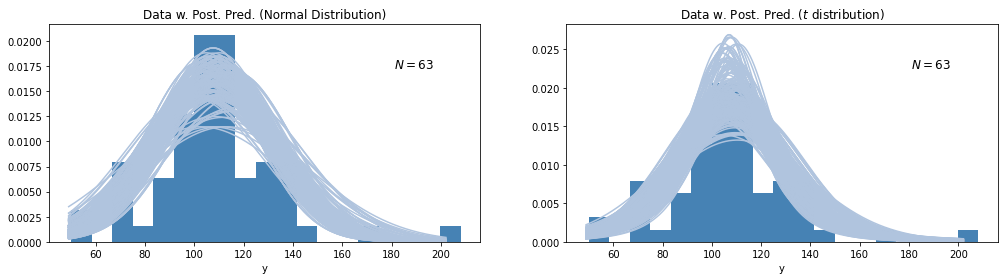

In [10]:
def plot_hist_dens_t(init,end,y,trace,num_ppcs,ax):
    if num_ppcs > len(trace):
        print('num_ppcs is greater than the length of the trace. '+str(num_ppcs)+' > '+str(len(trace))+ '.')
        print('You must enter a number less or equal than the length of the trace.')
        return None
    X = np.linspace(init,end,(end-init)*10)  # Between any two points there are ten points (e.g., 0, 0.1, 0.2, ...)
    Y = lambda mu,sigma,nu: [t.pdf(x,df=nu,loc=mu,scale=sigma) for x in X]
    [ax.plot(X,Y(s['μ'],s['σ'],s['ν']), color='lightsteelblue') for s in trace[len(trace)-num_ppcs:]]
    weights = np.ones_like(y)/(len(y)*10)  # Rescale the histogram to look like in the figure
    ax.hist(y, bins=19, weights=weights, color="steelblue")
    ax.text(0.8, 0.8, r'$N='+str(len(y))+'$', transform=ax.transAxes, fontsize=12)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(17,4))
plot_hist_dens(49,202,y,trace,250,ax=ax1)
plot_hist_dens_t(49,202,y,trace_mcmc,250,ax=ax2)
ax1.set_title('Data w. Post. Pred. (Normal Distribution)')
ax1.set_xlabel('y')
ax2.set_title('Data w. Post. Pred. ($t$ distribution)')
ax2.set_xlabel('y')
plt.show()

* Below we show the marginal distributions for the parameters in this
  model.

* There are two main differences with the previous results:
  1. The parameter $\mu$ is slightly tighter.
  2. The parameter $\sigma$ has greatly decreased. This is due to the
     flexibility that the $\nu$ parameters enables.
     * Consequently, the reason why $\sigma$ was so large in the
       normal distribution was the outliers. A normal distribution
       cannot fit outliers in any way but increasing $\sigma$. On the
       contrary, by using robust estimation (a $t$ distribution)
       $\sigma$ can be reduced and use $\nu$ to accommodate outliers.

* There seems to be no significant differences in the effect size.


In [ ]:
# Plotting Figure 16.9
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(15,14))
pm.plot_posterior(trace_mcmc['μ'], point_estimate='mode', ref_val=100, rope=(99,101), ax=axs[0,0])
plot_hist_dens_t(49,202,y,trace_mcmc,250,axs[0,1])
pm.plot_posterior(trace_mcmc['σ'], point_estimate='mode', ref_val=15, rope=(14,16), ax=axs[1,0])
pm.plot_posterior(trace_mcmc['log10_ν'], point_estimate='mode', ax=axs[2,0])
pm.plot_posterior(trace_mcmc['eff_size'], point_estimate='mode', ref_val=0, rope=(-0.1,0.1), ax=axs[1,1])
axs[0,0].set_title('Mean')
axs[0,0].set_xlabel('μ')
axs[0,1].set_title('Data w. Post. Pred.')
axs[0,1].set_xlabel('y')
axs[1,0].set_title('Scale')
axs[1,0].set_xlabel('σ')
axs[1,1].set_title('Effect Size')
axs[1,1].set_xlabel('(μ-100)/σ')
axs[2,0].set_title('Normality')
axs[2,0].set_xlabel('log10(ν)')
axs[2,1].axis('off')
fig.subplots_adjust(hspace=1)
plt.show()

### Diagnosis for $\nu$ — MCMC vs HMC

* The figures below show convergence metrics for the normality
  parameter $\nu$ in the MCMC and HMC estimations.

* There several points that show that HMC better estimates $\nu$:
  * The ESS is close to $20000$ as opposed to $2000$ for MCMC.
  * The MCSE is also lower for HMC.
  * The auto-correlation plots show much lower auto-correlation for HMC.
  * The traceplots show better representativeness for HMC.
  * The rank plots show more uniform histograms for HMC.

* **Rank Plots**. In order to measure the representativeness of the
  chains we plot rank plots for sets of draws. Intuitively, a
  well-converged distribution would have uniform ranks in all sets of
  draws. In other words, all histograms would have the same height.
  * For details see [Aki Vehtari, Andrew Gelman, Daniel Simpson, Bob
    Carpenter, Paul-Christian Burkner (2020). _"Rank-normalization,
    folding, and localization:An improved $\hat{R}$ for assessing
    convergence of MCMC"_](https://arxiv.org/pdf/1903.08008.pdf).
  * Rank plots are an alternative metric of the "shrink factor" we saw
    a few lectures earlier ([Andrew Gelman and Donald B. Rubin. _"Inference from iterative simulation using multiple sequences."_ Statistical science 7.4 (1992): 457-472.](https://projecteuclid.org/euclid.ss/1177011136)). They are shown to be a better metric and supported by data analytics libraries such as
    arviz.

In [ ]:
import arviz as az
pm.traceplot(trace_mcmc,var_names=['ν'])  # Density+Iterations
pm.autocorrplot(trace_mcmc,var_names=['ν']) # Autocorrelation
az.plot_rank(trace_mcmc, var_names=['ν']) # R^ (r hat)
plt.show()

In [ ]:
pm.traceplot(trace_hmc,var_names=['ν'])  # Density+Iterations
pm.autocorrplot(trace_hmc,var_names=['ν']) # Autocorrelation
az.plot_rank(trace_hmc, var_names=['ν']) # R^ (r hat) 
plt.show()

In [ ]:
pm.summary(trace_mcmc, var_names=['ν'])

In [ ]:
pm.summary(trace_hmc,var_names=['ν'])

## Two Groups

* It is often the case that an data analyst must compare results from
  different groups.
  * For instance, in this IQ example, it would make more sense to
    compare the results of the Smart Drug with those of a placebo group.
    
* We use the model below to analyze IQ data for a placebo group and
  another group taking a smart drug.
  * Note that the changes with respect to the previous models are
    minimal.


In [ ]:
y = df.Score.to_numpy()
μy = np.mean(y)
σy = np.std(y)
y_smart_drug = df[df.Group == 'Smart Drug'].Score
y_placebo = df[df.Group == 'Placebo'].Score
y_joint=[y_smart_drug,y_placebo]

with pm.Model() as two_groups:
    
    σ = pm.Uniform('σ',lower=σy/1000,upper=σy*1000,shape=2)
    μ = pm.Normal('μ',mu=μy,sigma=σy*100,shape=2)
    ν_minus_one = pm.Exponential('ν_minus_one',lam=1/29)
    ν = pm.Deterministic('ν',ν_minus_one+1)

    # 0: Smart drug
    # 1: Placebo
    [pm.StudentT('obs_'+str(i), nu=ν, mu=μ[i], sigma=σ[i], observed=y_joint[i]) for i in [0,1]]

    pm.Deterministic('log10_ν',np.log10(ν))
    pm.Deterministic('diff_μ', μ[0]-μ[1])
    pm.Deterministic('diff_σ', σ[0]-σ[1])
    pm.Deterministic('eff_size',(μ[0]-μ[1])/pm.math.sqrt((pm.math.sqr(σ[0])+pm.math.sqr(σ[1]))/2))    

    trace_two_groups=pm.sample(20000)

* Below we show a graphical representation of the model

<img src="figures/model_two_groups.png" width="900px">

### Interpreting the results — Posterior Analysis

* The figure below shows the marginal distribution of all parameters
  as well as the differences of means and scales, and the effect size.

* The mean difference suggest that the drug increases IQ in 8 points!
  However, the 95% credible interval barely excludes a ROPE of
  $\pm0.5$.

* Similarly the scales difference suggest a that the Smart Drug
  introduces a great difference in Scale.

* The effect size plot confirms that the difference is minimal as the
  95% HDI includes part of a very small ROPE of $\pm0.1$.
  
* **[QUESTION Why is it better to look to compute differences from the
  joint distribution than working directly with the marginals?]**



In [ ]:
smart_drug_μs = np.array([s[0] for s in trace_two_groups['μ']])
smart_drug_σs = np.array([s[0] for s in trace_two_groups['σ']])
placebo_μs = np.array([s[1] for s in trace_two_groups['μ']])
placebo_σs = np.array([s[1] for s in trace_two_groups['σ']])
νs = trace_two_groups['ν']
smart_drug_trace = np.array([x for x in zip(smart_drug_μs,smart_drug_σs,νs)], dtype=[('μ','f4'),('σ','f4'),('ν','f4')])
placebo_trace = np.array([x for x in zip(placebo_μs,placebo_σs,νs)], dtype=[('μ','f4'),('σ','f4'),('ν','f4')])

fig,axs = plt.subplots(nrows=5,ncols=2,figsize=(15,27))

pm.plot_posterior(placebo_μs, ax=axs[0,0], point_estimate='mode', credible_interval=.95)
pm.plot_posterior(smart_drug_μs, ax=axs[1,0], point_estimate='mode', credible_interval=.95)
pm.plot_posterior(placebo_σs, ax=axs[2,0], point_estimate='mode', credible_interval=.95)
pm.plot_posterior(smart_drug_σs, ax=axs[3,0], point_estimate='mode', credible_interval=.95)
pm.plot_posterior(trace_two_groups['log10_ν'], ax=axs[4,0], point_estimate='mode', credible_interval=.95)
plot_hist_dens_t(49,202,y_placebo,placebo_trace,50,ax=axs[0,1])
plot_hist_dens_t(49,202,y_smart_drug,smart_drug_trace,50,ax=axs[1,1])
pm.plot_posterior(trace_two_groups['diff_μ'],ax=axs[2,1], point_estimate='mode',ref_val=0, rope=(-0.5,0.5), credible_interval=.95)
pm.plot_posterior(trace_two_groups['diff_σ'],ax=axs[3,1], point_estimate='mode',ref_val=0, rope=(-0.5,0.5), credible_interval=.95)
pm.plot_posterior(trace_two_groups['eff_size'],ax=axs[4,1], point_estimate='mode',ref_val=0, rope=(-0.1,0.1), credible_interval=.95)
fig.subplots_adjust(hspace=0.5)

axs[0,0].set_title('Placebo Mean')
axs[0,0].set_xlabel('μ₁')
axs[1,0].set_title('Smart Drug Mean')
axs[1,0].set_xlabel('μ₀')

axs[2,0].set_title('Placebo Scale')
axs[2,0].set_xlabel('σ₁')
axs[3,0].set_title('Smart Drug Scale')
axs[3,0].set_xlabel('σ₀')

axs[4,0].set_title('Normality')
axs[4,0].set_xlabel('log10(ν)')

axs[0,1].set_title('Data for Placebo w. Post. Pred.')
axs[0,1].set_xlabel('y')

axs[1,1].set_title('Data for Smart Drug w. Post. Pred.')
axs[1,1].set_xlabel('y')

axs[2,1].set_title('Difference of Means')
axs[2,1].set_xlabel('μ₀-μ₁')

axs[3,1].set_title('Difference of Scales')
axs[3,1].set_xlabel('σ₀-σ₁')

axs[4,1].set_title('Effect Size')
axs[4,1].set_xlabel('$\mu_0-\mu_1/\sqrt{ \sigma^2_0 + \sigma^2_1 / 2}$')

plt.show()

## Other noise distributions

* It is possible that our first choice for the noise distribution do
  not correctly model the data.
  * As we have seen, in the case of a normal distribution, the results
    is having an artificially inflated standard deviation.
    
* There are two approaches to tackle this problem:
  1. **Transform the data to a new scale that fits the distribution.**
     * Old software for data analysis forced analysts to transform the
       data to the few supported distribution. This has the problem
       that results can be difficult to interpreted in the transformed
       dataset.
  2. **Choose a better noise distribution**.
     * In modern software such as pymc3, there is great flexibility in
       choosing appropriate distribution.

## Exercises

1. Construct the left model in Figure 16.2 (using precision
   $1/\sqrt{\tau}$) and generate Figure 16.3. 
   * Use a non noncommittal prior for $\tau$ with $\mathit{Sh} = 0.01$
     and $R = 0.01$.
   * _Hint_: Use a reference the right model of Figure 16.2 presented
     in this notebook.
     
2. Exercise 16.1
3. Exercise 16.2
4. Exercise 16.3